In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names =[
        't', # Time (secs)
        'q1', 'q2', 'q3', # Joint angle (rads)
        'dq1', 'dq2', 'dq3', # Joint velocity (rads/sec)
        'I1', 'I2', 'I3', # Motor current (A)
        'eps21', 'eps22', 'eps31', 'eps32', # Strain gauge measurements ($\mu$m /m )
        'ddq1', 'ddq2', 'ddq3' # Joint accelerations (rad/sec^2)
        ]

df = pd.read_csv('https://raw.githubusercontent.com/sdrangan/introml/2801f72d7a4fff0633ede56ba701984f9bb05652/mult_lin_reg/exp1.csv',
                 header=None,delim_whitespace=False,names=names,na_values=float)
df.head(6)

,t,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
0,0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
1,0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
2,0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
3,0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
4,0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
5,0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


Text(0, 0.5, 'Current I2 (A)')

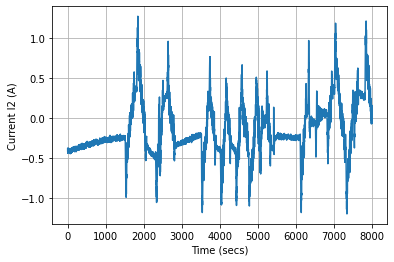

In [3]:
y = np.array(df['I2'])
t = np.array(df.index)
plt.plot(t,y)
plt.grid()
plt.xlabel('Time (secs)')
plt.ylabel('Current I2 (A)')

In [4]:
ytrain = np.array(df['I2'])
Xtrain = np.array(df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']])

In [5]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(Xtrain, ytrain)

LinearRegression()

Text(0, 0.5, 'Current I2 (A)')

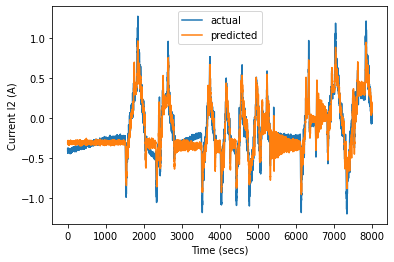

In [6]:
ytrain_pred = regr.predict(Xtrain)
plt.plot(t,ytrain)
plt.plot(t,ytrain_pred)
plt.legend(['actual', 'predicted'])
plt.xlabel('Time (secs)')
plt.ylabel('Current I2 (A)')

In [7]:
RSS_train = np.mean((ytrain-ytrain_pred)**2) / np.mean((ytrain-np.mean(ytrain))**2)
RSS_train

0.09583263861233197

Text(0, 0.5, 'Current I2 (A)')

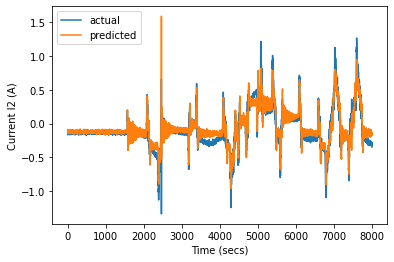

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/sdrangan/introml/2801f72d7a4fff0633ede56ba701984f9bb05652/mult_lin_reg/exp2.csv',
                 header=None,delim_whitespace=False,names=names,na_values=float)
ytest = np.array(df['I2'])
Xtest = np.array(df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']])
ttest = np.array(df.index)
ytest_pred = regr.predict(Xtest)
plt.plot(t,ytest)
plt.plot(t,ytest_pred)
plt.legend(['actual', 'predicted'])
plt.xlabel('Time (secs)')
plt.ylabel('Current I2 (A)')

In [9]:
RSS_test = np.mean((ytest-ytest_pred)**2) / np.mean((ytest-np.mean(ytest))**2)
RSS_test

0.12678048804762415